In [1]:
#  import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New_Dataset/train'
valid_path = '/content/drive/MyDrive/New_Dataset/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders = glob('/content/drive/MyDrive/New_Dataset/train/*')

In [6]:
folders

['/content/drive/MyDrive/New_Dataset/train/covid+',
 '/content/drive/MyDrive/New_Dataset/train/normal']

In [7]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:


# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 846 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New_Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 280 images belonging to 2 classes.


In [15]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)

)

Epoch 1/10
27/27 [==============================] - 429s 15s/step - loss: 0.8192 - accuracy: 0.6684 - val_loss: 0.0538 - val_accuracy: 0.9786
Epoch 2/10
27/27 [==============================] - 43s 2s/step - loss: 0.0766 - accuracy: 0.9741 - val_loss: 0.0267 - val_accuracy: 0.9929
Epoch 3/10
27/27 [==============================] - 43s 2s/step - loss: 0.0296 - accuracy: 0.9879 - val_loss: 0.0227 - val_accuracy: 0.9964
Epoch 4/10
27/27 [==============================] - 43s 2s/step - loss: 0.0333 - accuracy: 0.9840 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 5/10
27/27 [==============================] - 43s 2s/step - loss: 0.0137 - accuracy: 0.9946 - val_loss: 0.0203 - val_accuracy: 0.9893
Epoch 6/10
27/27 [==============================] - 43s 2s/step - loss: 0.0143 - accuracy: 0.9935 - val_loss: 0.0160 - val_accuracy: 0.9929
Epoch 7/10
27/27 [==============================] - 43s 2s/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9929
Epoch 8/10
27/27 [

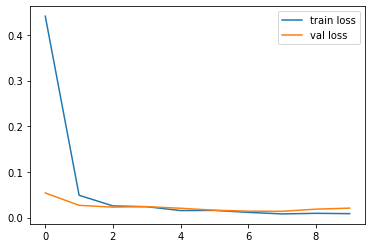

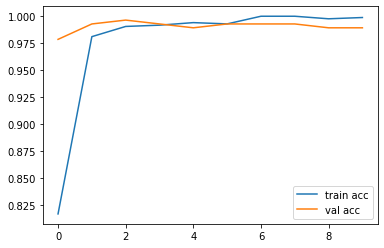

In [16]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
model.save('model_vgg16.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[9.91412282e-01, 8.58774688e-03],
       [1.25020364e-04, 9.99874949e-01],
       [9.80940521e-01, 1.90594736e-02],
       [9.99968052e-01, 3.20066465e-05],
       [9.60637450e-01, 3.93625274e-02],
       [3.17905433e-05, 9.99968171e-01],
       [9.71147597e-01, 2.88524106e-02],
       [9.99854207e-01, 1.45794009e-04],
       [8.28696251e-01, 1.71303749e-01],
       [9.93279874e-01, 6.72013685e-03],
       [1.19403958e-05, 9.99988079e-01],
       [4.34105568e-05, 9.99956608e-01],
       [3.77168953e-06, 9.99996185e-01],
       [2.56021831e-05, 9.99974370e-01],
       [5.45305375e-05, 9.99945521e-01],
       [6.64929889e-09, 1.00000000e+00],
       [9.98602808e-01, 1.39715185e-03],
       [2.96032339e-01, 7.03967631e-01],
       [9.32263434e-01, 6.77365884e-02],
       [9.99312162e-01, 6.87828520e-04],
       [1.21091734e-05, 9.99987841e-01],
       [2.13337285e-06, 9.99997854e-01],
       [1.04859919e-05, 9.99989510e-01],
       [9.99325275e-01, 6.74706942e-04],
       [9.999235

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_vgg19.h5')

In [24]:
img=image.load_img('/content/drive/MyDrive/New_Dataset/test/normal/IM-0370-0001.jpeg',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [156., 156., 156.],
        [161., 161., 161.],
        [163., 163., 163.]],

       [[254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [120., 120., 120.],
        [122., 122., 122.],
        [118., 118., 118.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [ 86.,  86.,  86.],
        [ 81.,  81.,  81.],
        [ 87.,  87.,  87.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [26]:
x.shape

(224, 224, 3)

In [27]:







x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[9.9999094e-01, 9.0423828e-06]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a[0]

0

In [32]:
if (a==1):
    print("normal")
else:
    print("Covid Positive")

Covid Positive
